<h1 align='center'>
<p style='color: lawngreen'>
<b>
TRAVEL INSURANCE PREDICTION
</b>
</p>
</h1>
<br>

## Process

1. Analyze and Preprocess data
2. Feature Engineering
3. Divide the dataset into 2 Training and Test sets
4. Use Pipeline
    - a. Use Scaler and Dimensional reduction (if it is necessary)
    - b. Use suitable Naive Bayes for this problem
5. Perform model on Training and Testing set using Gridsearch CV
6. Measure performance of the model
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)

https://en.wikipedia.org/wiki/Web_colors

https://bookdown.org/aschmi11/RESMHandbook/data-visualization-with-ggplot.html

## Read and Load Dataset

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

- **Age**: Age of the Customer.
- **Employment Type**: The Sector in which Customer is employed.
- **GraduateOrNot**: Whether the Customer is college graduate or not.
- **AnnualIncome**: The yearly Income of the Customer in Indian Rupees.
- **FamilyMembers**: Number of Members in Customer's family.
- **ChronicDisease**: Whether the Customer suffers from any major disease or conditions like Diabetes/High BP or Asthama,...
- **FrequentFlyer**: Derived data based on Customer's History of Booking Air Tickets on atleast 4 different Instances in the last 2 years (2017-2019).
- **EverTravelledAbroad**: Has the Customer ever travelled to a foreign country.
- **TravelInsurance**: Did the Customer buy Travel Insurance Package during Introductory offering held in the year 2019.

Our target is 'TravelInsurance' column.

In [1]:
import numpy as np
import pandas as pd
import math

### Load and Describe dataset

In [2]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.head(3)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1987.0,993.000000,573.741812,0.0,496.5,993.0,1489.5,1986.0
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


This dataset has 1987 rows.

## 1. Analyze and Preprocess data

First, we drop the 'Unnamed: 0' column.

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


### 1.1. Build Visualization function

In [5]:
# for ploting:
import matplotlib.pyplot as plt
import seaborn as sns

# optional
import warnings
warnings.filterwarnings('ignore')

In [6]:
# set font for ploting:
font = {'fontsize': 16,
        'fontstyle': 'italic',
        'backgroundcolor': 'black',
        'color': 'white'}

%matplotlib inline

plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8')

In [7]:
def plots(df, x, y, axes, i):
    
    '''Show histplots and barplot of df'''
    
    sns.histplot(df, x=x, kde=True, color='orange', ax=axes[i][0])
    sns.histplot(df, x=x, hue=y, kde=True, ax=axes[i][1])
    
    group = df.groupby(y)
    
    sns.barplot(x=group[x].mean().index,
                y=group[x].mean(),
                ax=axes[i][2])
    
    for container in axes[i][2].containers:
        axes[i][2].bar_label(container, size=15, color='black')
        
    axes[i][3].pie(df[y].value_counts(),
                   labels=df[y].value_counts().index,
                   colors=['blue', 'orange'],
                   shadow=True, explode=[0, 0.05],
                   autopct='%1.1f%%')

In [8]:
def plot_group(df, x, y):
    
    fig, axes = plt.subplots(nrows=len(y), ncols=4, figsize=(20, 20))
    
    for i in range(len(y)):
        plots(df, x, y[i], axes, i)
    
    plt.suptitle(f'Barplots and histograms of {x} grouped by categorical features', size=20)
    
    plt.tight_layout()
    plt.show()

### 1.2. Analyze data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


Because data was processed, so we change the type of 2 columns: 'ChronicDiseases' and 'TravelInsurance' to `str`.

In [10]:
df = df.astype(
    {
        'ChronicDiseases': str,
        'TravelInsurance': str
    }
)

To easy analyse data, we change the name of 'TravelInsurance' column to 'target'.

In [11]:
df = df.rename(columns={'TravelInsurance': 'target'})
df.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,target
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


Show numerical and categorical data from dataset.

In [12]:
categorical_df = df.select_dtypes(exclude='number')
numerical_df = df.select_dtypes(include='number')

print(f'Categorical columns:\n{categorical_df.columns}')
print(f'\nNumerical columns:\n{numerical_df.columns}')

Categorical columns:
Index(['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'target'],
      dtype='object')

Numerical columns:
Index(['Age', 'AnnualIncome', 'FamilyMembers'], dtype='object')


#### 1.2.1. Categorical_df

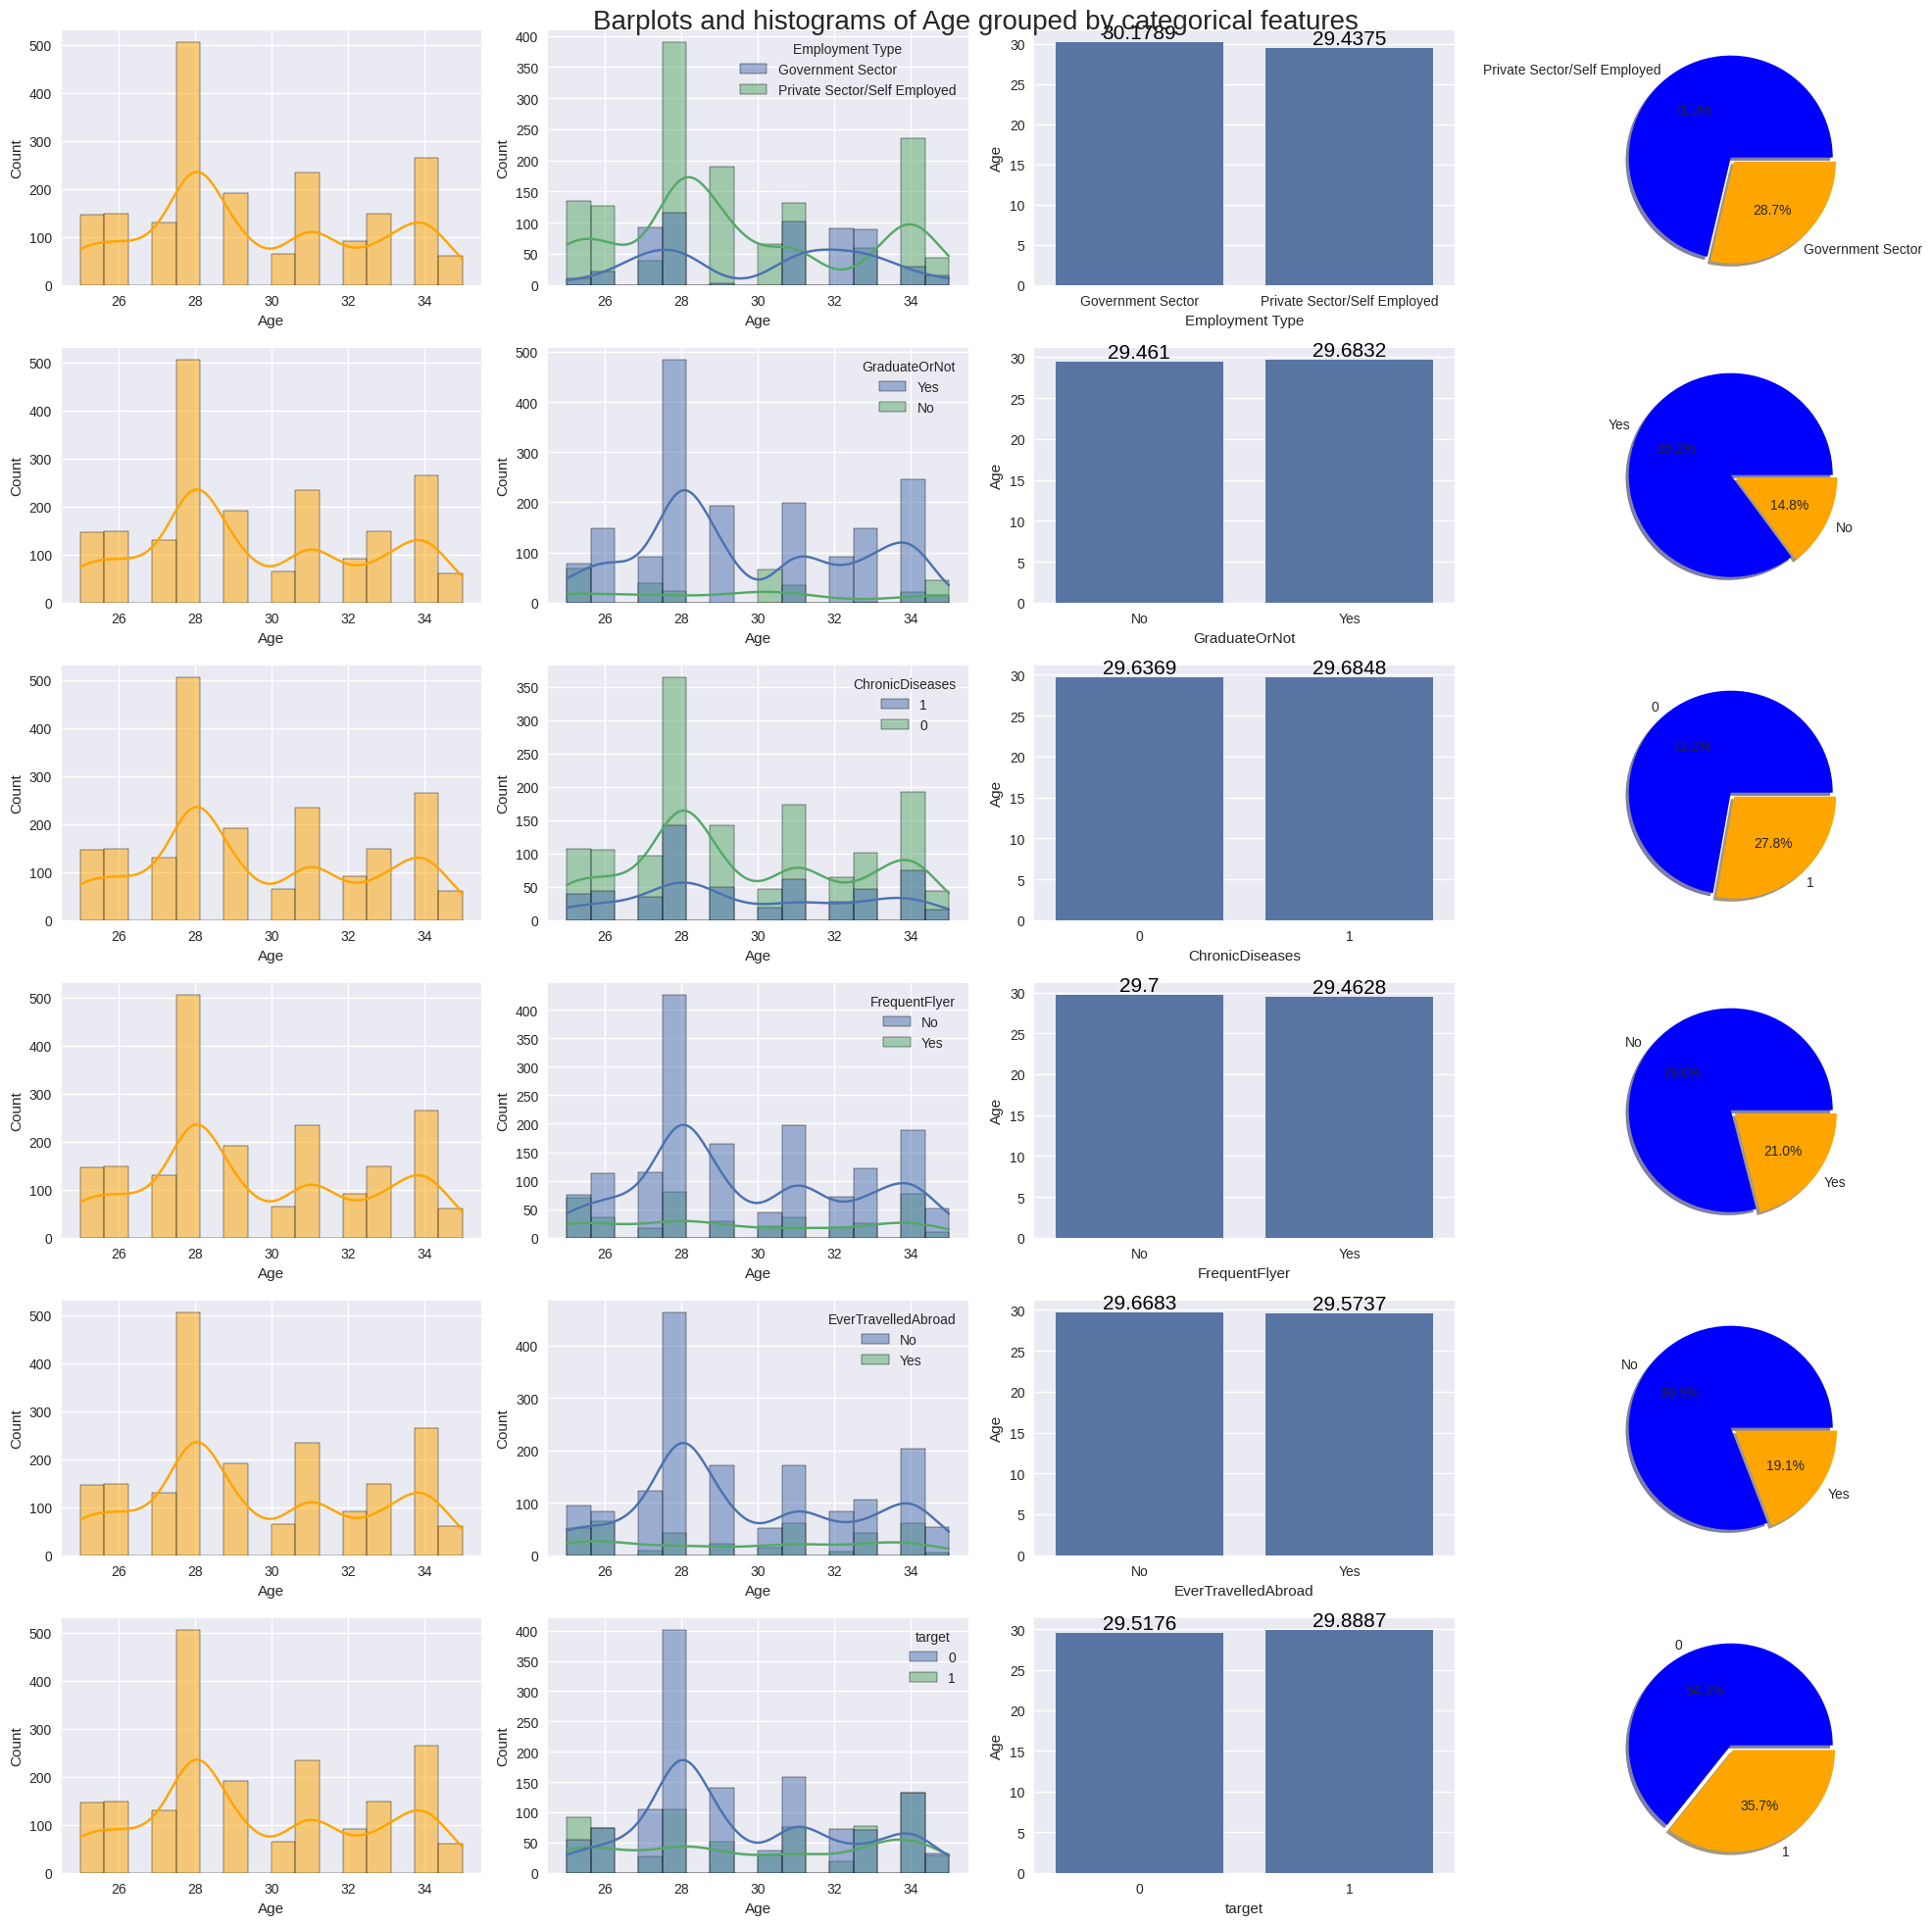

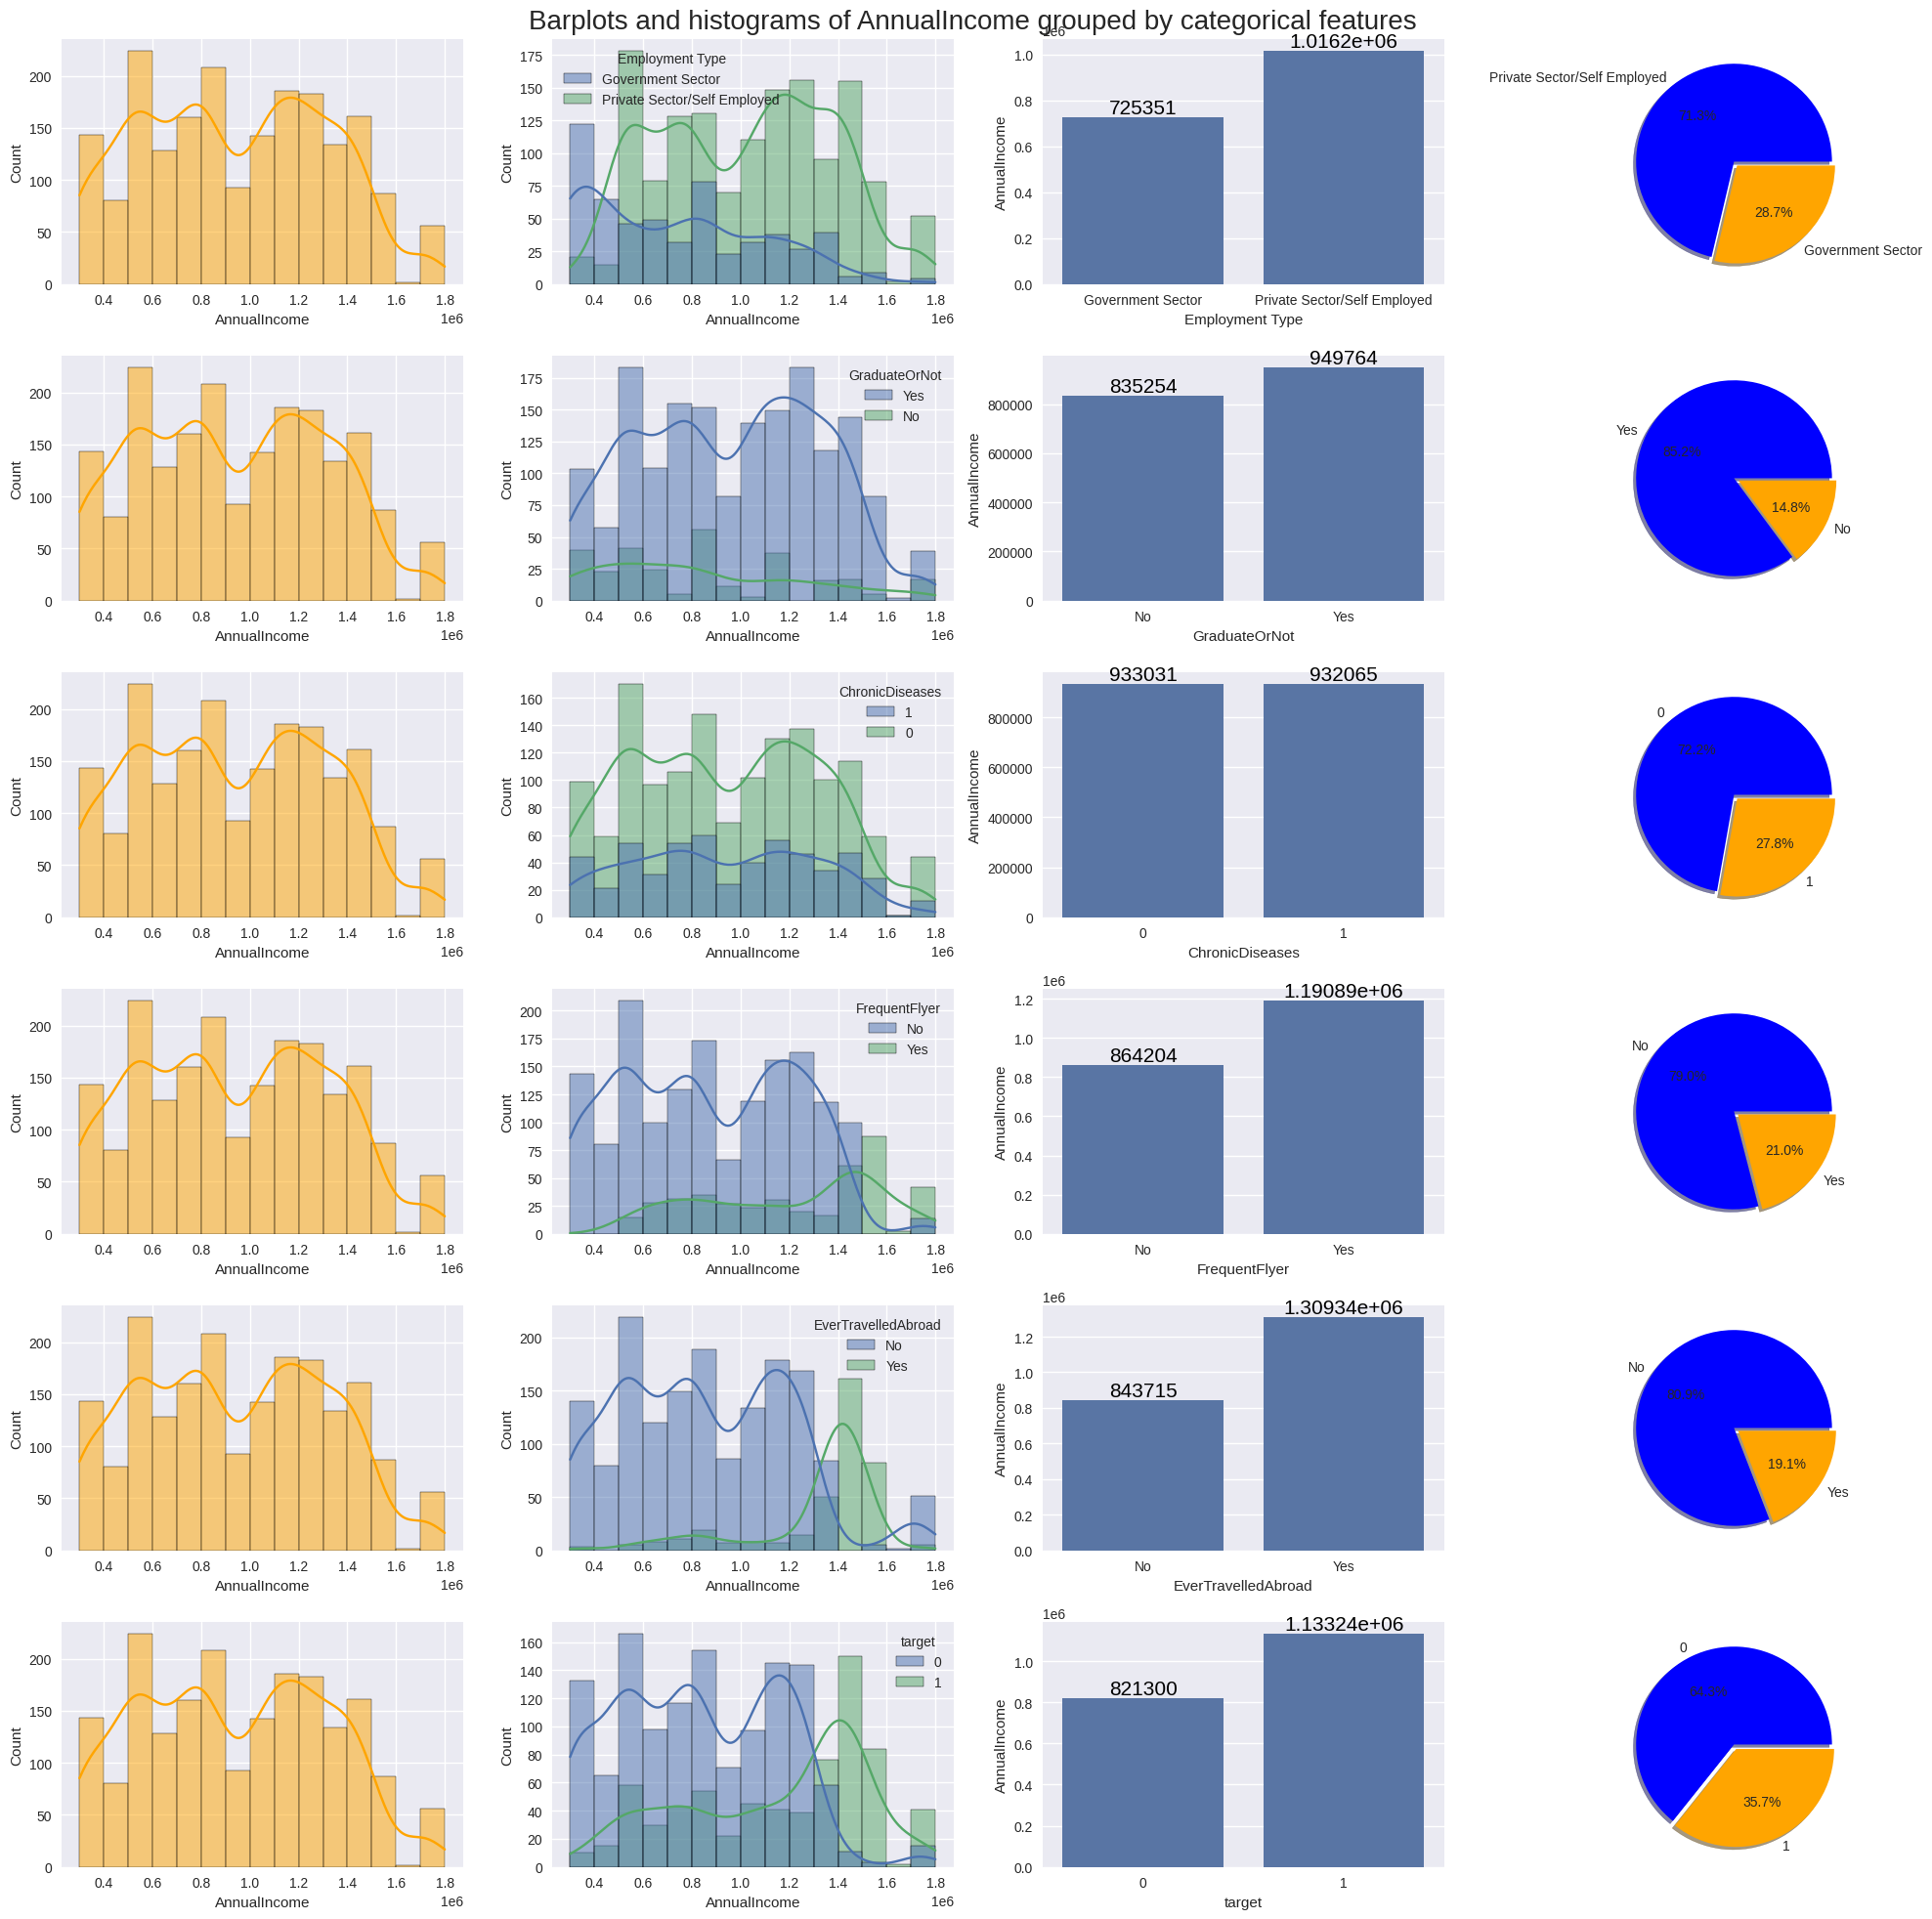

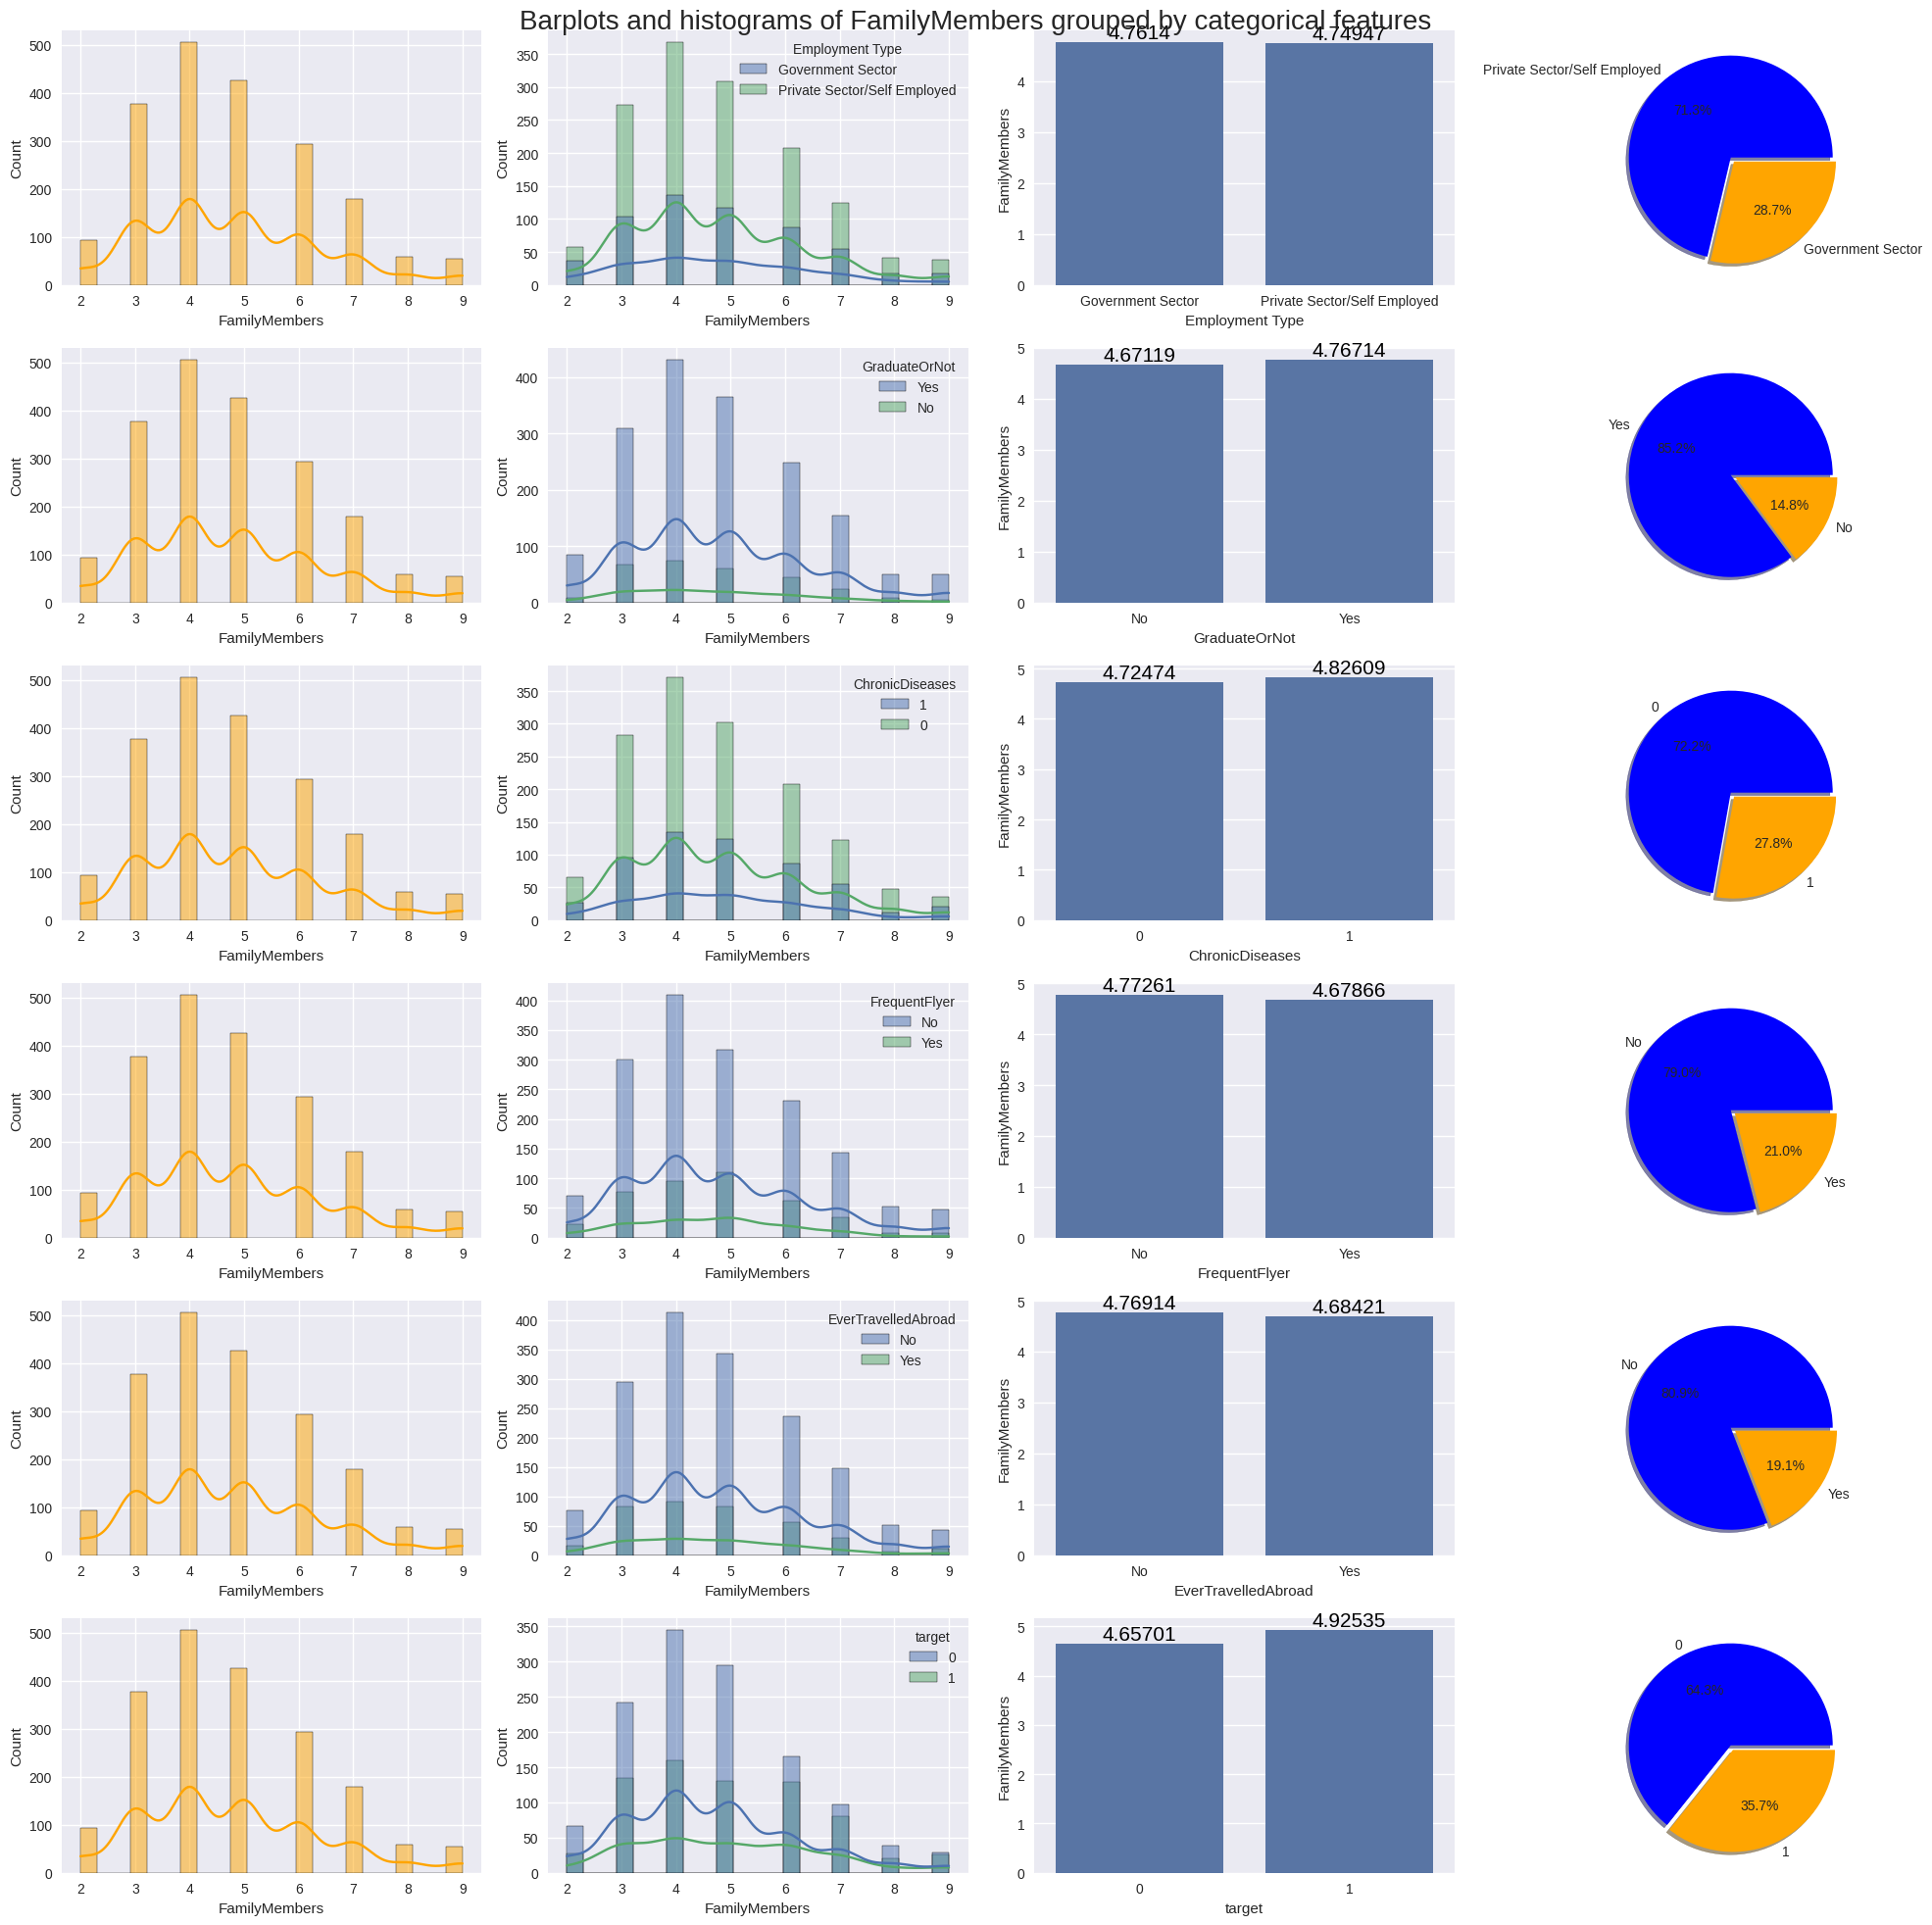

In [13]:
for i in numerical_df.columns:
    plot_group(df, i, categorical_df.columns)

https://www.kaggle.com/code/a3amat02/travel-insurance-classifier-and-eda

#### 1.2.2. Numerical_df

We see the plot of numerical data:

In [14]:
numerical_df.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers'], dtype='object')

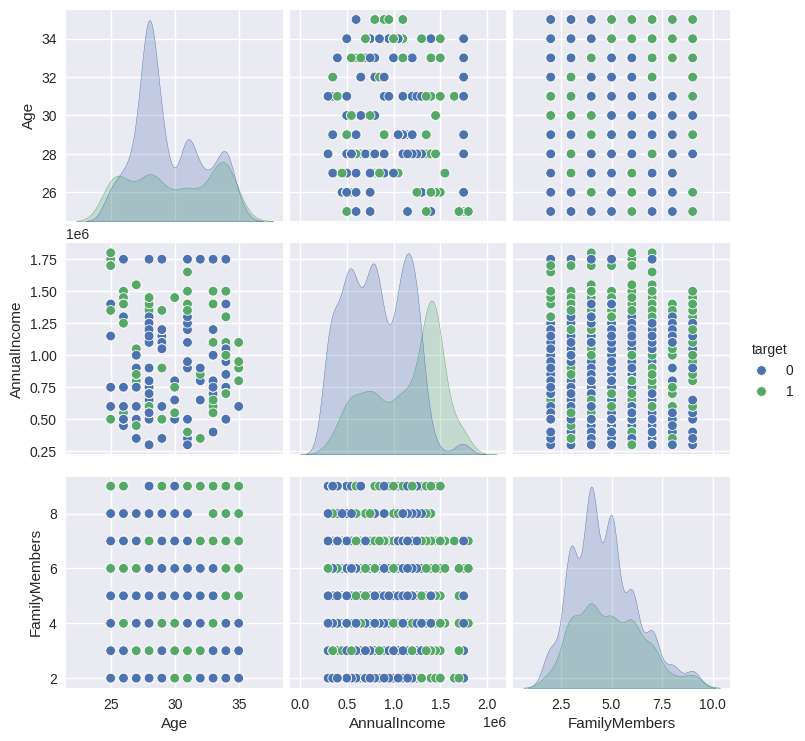

In [15]:
sns.pairplot(df, vars=['Age', 'AnnualIncome', 'FamilyMembers'], hue='target')

Check the quantity of target column:

In [16]:
df['target'].value_counts()

target
0    1277
1     710
Name: count, dtype: int64

In [17]:
import plotly.express as px
import plotly.io as pio

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Preprocess Data

Check how many duplicated values:

In [18]:
df.duplicated().sum()

738

There are so many duplicated values in this dataset. So we need to drop them.

In [19]:
print(f'The shape of data before preprocess data: {df.shape}')

The shape of data before preprocess data: (1987, 9)


In [20]:
df = df.drop_duplicates()
df = df.dropna()

df.duplicated().sum()

0

Finally, we check the shape of data after preprocessing.

In [21]:
print(f'The shape of data after preprocess data: {df.shape}')

The shape of data after preprocess data: (1249, 9)


## 2. Feature Engineering

See our dataframe again:

In [22]:
df.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,target
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


In [23]:
dummy_df = pd.get_dummies(df, columns=categorical_df.drop(columns=['target']).columns, drop_first=True)
dummy_df.head(3)

,Age,AnnualIncome,FamilyMembers,target,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,ChronicDiseases_1,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,0,False,True,True,False,False
1,31,1250000,7,0,True,True,False,False,False
2,34,500000,4,1,True,True,True,False,False


Confirming absense of outliers in our dataset by drawing boxplot for numerical_df:

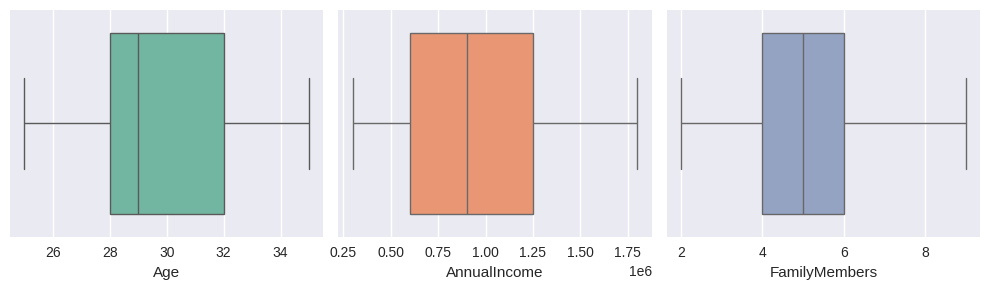

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

colors = sns.color_palette('Set2', numerical_df.shape[1])
for i, col in enumerate(numerical_df.columns):
  sns.boxplot(data=numerical_df, x=col, ax=ax[i], color=colors[i])

plt.tight_layout()

Draw heatmap to see the correlation of our dataset.

[Text(0.5, -23.77777777777777, ''), Text(-21.277777777777796, 0.5, '')]

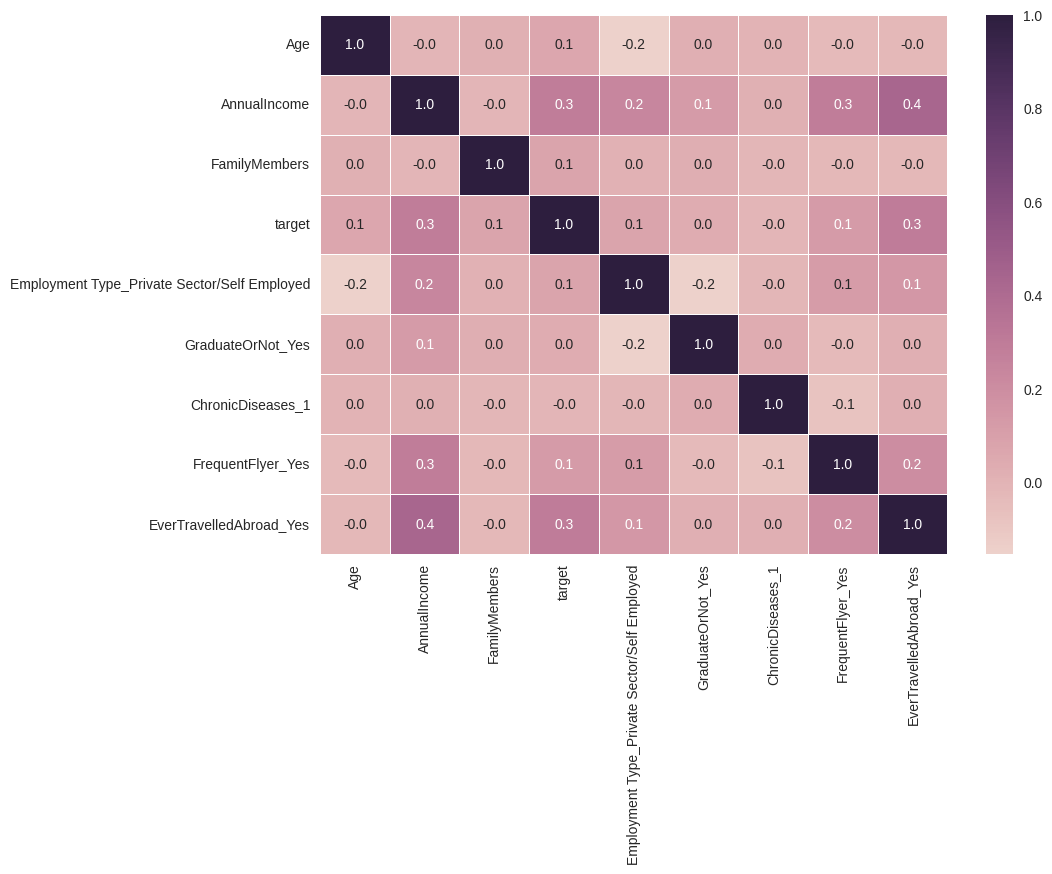

In [25]:
ax = sns.heatmap(dummy_df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), 
                 annot=True, annot_kws={'size':10}, linewidth=.5, fmt=".1f")
ax.set(xlabel='', ylabel='')

Now we drop all of the columns has correlated value less than 0.1 (so low) and draw the heatmap again.

In [26]:
dummy_df.corr()['target']

Age                                             0.067536
AnnualIncome                                    0.293913
FamilyMembers                                   0.084907
target                                          1.000000
Employment Type_Private Sector/Self Employed    0.076309
GraduateOrNot_Yes                               0.031770
ChronicDiseases_1                              -0.010015
FrequentFlyer_Yes                               0.127426
EverTravelledAbroad_Yes                         0.301224
Name: target, dtype: float64

[Text(0.5, -23.77777777777777, ''), Text(-21.27777777777779, 0.5, '')]

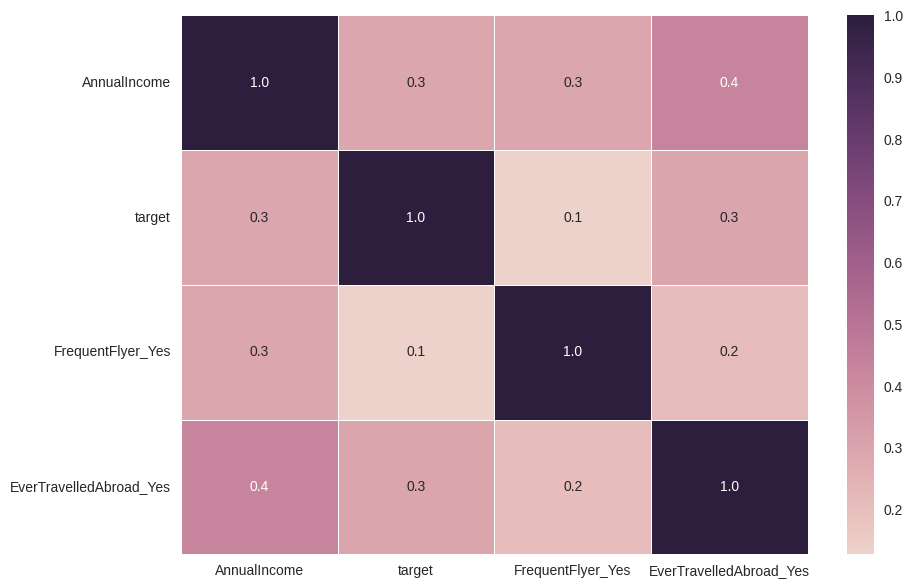

In [27]:
for value, col in zip(dummy_df.corr()['target'], dummy_df.columns):
  if abs(value) < 0.1:
    dummy_df.drop(columns=col, inplace=True)

ax = sns.heatmap(dummy_df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, linewidth=.5, fmt=".1f")
ax.set(xlabel='', ylabel='')

We can see that 'AnnualIncome' and 'EverTravelledAbroad' have high correlation with 'target' column.

## 3. Split Train-Test Data

In [28]:
X, y = dummy_df.drop(columns=['target']).values, np.array(dummy_df['target']).reshape((-1, 1))

print(f'X_shape: {X.shape}\nY_Shape: {y.shape}')

X_shape: (1249, 3)
Y_Shape: (1249, 1)


Now we split our data into Training set and Testing set.

In [29]:
# for split train-test:
from sklearn.model_selection import train_test_split

In [30]:
def split_train_test(X, y: float, train_size: float=0.7, random_state: int=24):
    
    train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                        train_size=train_size,
                                                        random_state=random_state,
                                                        shuffle=True)
    
    print(f'Shape of X_train: {train_X.shape}')
    print(f'Shape of y_train: {train_y.shape}')
    print(f'Shape of X_test: {test_X.shape}')
    print(f'Shape of y_test: {test_y.shape}')
    
    return train_X, test_X, train_y, test_y

In [31]:
X_train, X_test ,y_train, y_test = split_train_test(X, y, 0.8, 242)

Shape of X_train: (999, 3)
Shape of y_train: (999, 1)
Shape of X_test: (250, 3)
Shape of y_test: (250, 1)


## 4. Build Scikit-learn Model

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# make pipeline:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [37]:
def build_GaussianNB_model(X, y):
    
    '''Gaussian Naive Bayes for numerical data'''
    
    pipeline = Pipeline(
        steps = [
            ('scaler', MinMaxScaler()),
            ('gnb', GaussianNB()),
        ]
    )
    
    return pipeline.fit(X, y).predict(X)

In [ ]:
# def build_BernoulliNB_model()

## 5. Perform and Measure model

In [38]:
# for evalute model's preformance:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, \
  accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [39]:
def show_performance(y_true, y_pred):
    
    '''
    Show the performance of our model 
    Params:
        y_true: ground truth values
        y_pred: our prediction
    Return:
        Metrics to evalute model's performance
    '''
    
    # Todo: Return our error value like accuracy, f1score, ...
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'F1: {f1_score(y_true, y_pred)}')
    print(f'Confusion matrix:\n{confusion_matrix(y_true, y_pred)}')
    print(f'Classification report:\n{classification_report(y_true, y_pred)}')
   
    # Todo: Only choose one of them as our score
    main_score = f1_score(y_true, y_pred)
    
    return main_score

In [41]:
y_pred = build_GaussianNB_model(X_train, y_train)
y_pred

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1

In [43]:
y_pred.shape

(999,)

In [44]:
y_train.shape

(999, 1)

In [47]:
y_train = y_train.astype('int')
y_pred = y_pred.astype('int')

In [50]:
show_performance(y_train, y_pred)

Precision: 0.622568093385214
Recall: 0.4071246819338422
Accuracy: 0.6696696696696697
F1: 0.49230769230769234
Confusion matrix:
[[509  97]
 [233 160]]
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       606
           1       0.62      0.41      0.49       393

    accuracy                           0.67       999
   macro avg       0.65      0.62      0.62       999
weighted avg       0.66      0.67      0.65       999



0.49230769230769234

## 7. Conclusion

Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? 